In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import pandas as pd

## Test on simulated data

On connait le nombre de classe, donc on défini k par ce nombre. 

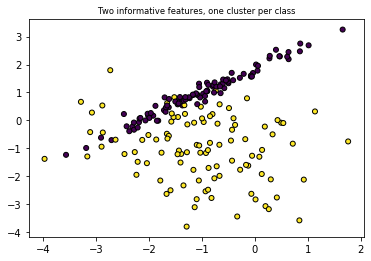

In [2]:
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

k1 = 2

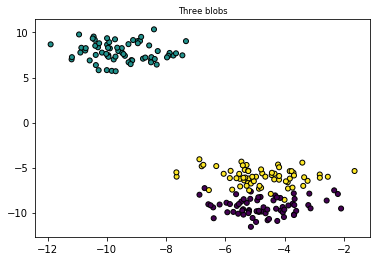

In [3]:
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

k2 = 3

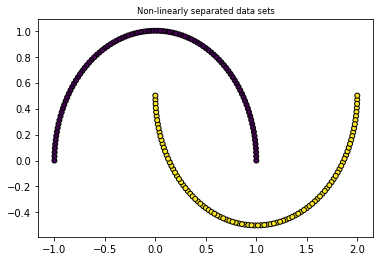

In [4]:
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

k3 = 2

In [7]:
d_name = ["Two informative features, one cluster per class", "Three blobs", "Non-linearly separated data sets"]
d_set = [X1,X2,X3]
c_set = [Y1,Y2,Y3]
k_set = [k1,k2,k3]

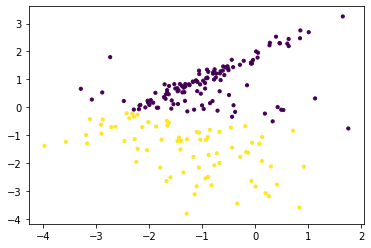

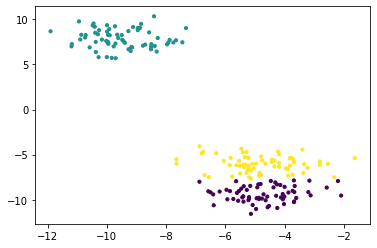

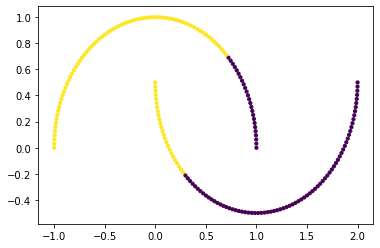

In [8]:
for X,k in zip(d_set,k_set) :
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    km.fit(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)
    plt.show()

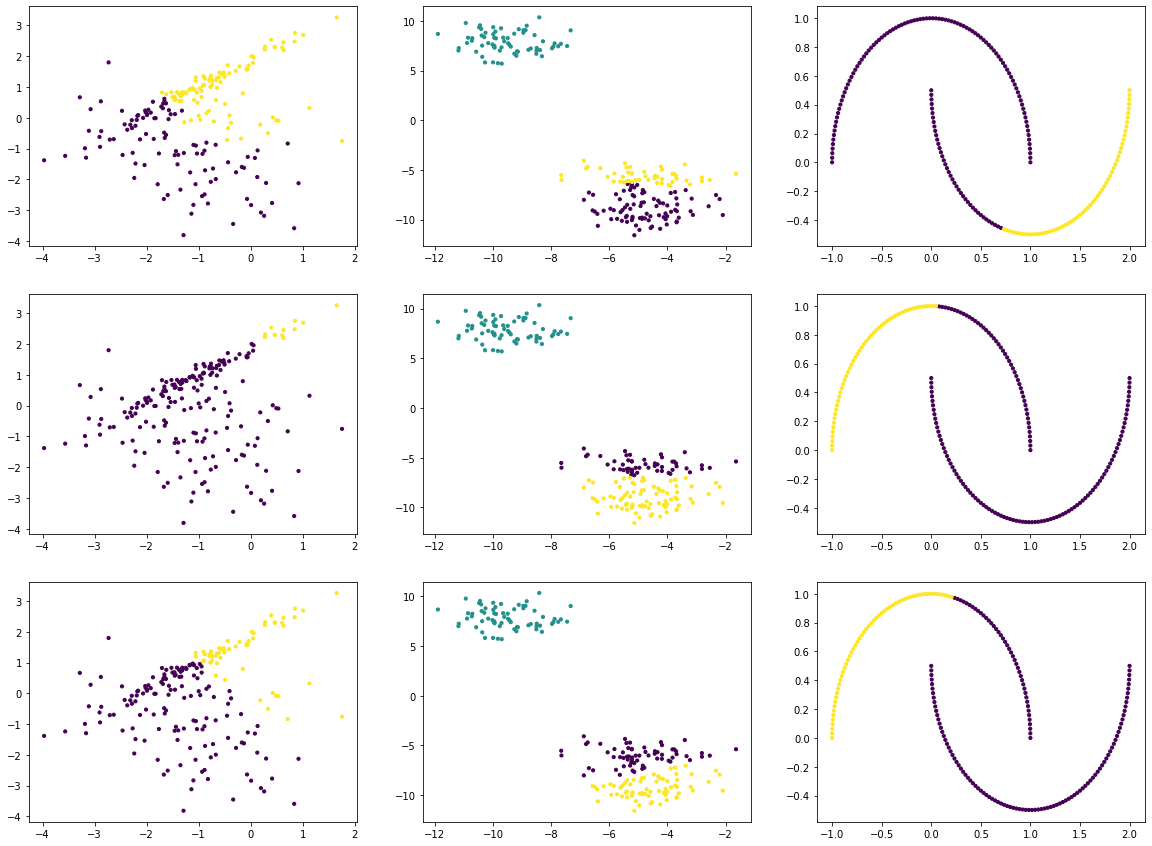

In [9]:
kinds = ('ward', 'average', 'complete')
f, axarr = plt.subplots( len(d_set),len(kinds) , figsize = ((20,15))) 

for i in range(len(d_set)):
    X = d_set[i]
    k = k_set[i]
    for j in range(len(kinds)):
        linkage = kinds[j]
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
        clustering.fit(X)
        
        axarr[j,i].scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
                        
plt.show()

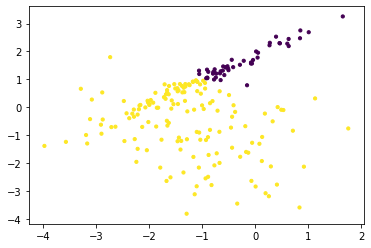

/home/alex/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


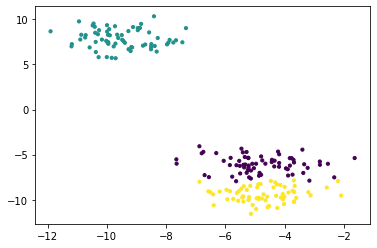

/home/alex/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


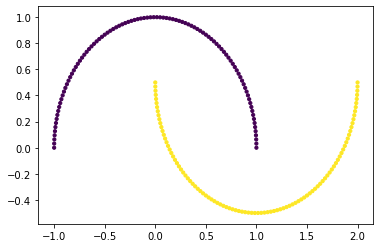

In [10]:
for X,k in zip(d_set,k_set) :
    spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="nearest_neighbors")
    spectral.fit(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)
    plt.show()

In [11]:
tableau = {}

for X,Y,k,name in zip(d_set, c_set, k_set, d_name):
    cl = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    cl.fit(X)
    
    homogeneity = metrics.homogeneity_score(Y, cl.labels_)
    completeness = metrics.completeness_score(Y, cl.labels_)
    v_measure = metrics.v_measure_score(Y, cl.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
    silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
    
    total = v_measure + adjusted_rand_index + silhouette_coefficient
    
    t_id = "kmeans | "+name
    tableau[t_id] = {"homogeneity": homogeneity, 
                     "completeness": completeness, 
                     "v_measure": v_measure, 
                     "adjusted_rand_index": adjusted_rand_index,
                     "silhouette_coefficient": silhouette_coefficient,
                     "total" : total
                    }
    
for X, k, name in zip(d_set, k_set, d_name):
    for linkage in ('ward', 'average', 'complete'):
        cl = AgglomerativeClustering(linkage=linkage, n_clusters=k)
        cl.fit(X)

        homogeneity = metrics.homogeneity_score(Y, cl.labels_)
        completeness = metrics.completeness_score(Y, cl.labels_)
        v_measure = metrics.v_measure_score(Y, cl.labels_)
        adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
        silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
        
        total = v_measure + adjusted_rand_index + silhouette_coefficient
        
        t_id = "agglomerative | "+name+ " ("+linkage+")"
        tableau[t_id] = {"homogeneity": homogeneity, 
                         "completeness": completeness, 
                         "v_measure": v_measure, 
                         "adjusted_rand_index": adjusted_rand_index,
                         "silhouette_coefficient": silhouette_coefficient,
                         "total" : total
                         
                        }

for X, k, name in zip(d_set, k_set, d_name):
    cl = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="nearest_neighbors")
    cl.fit(X)
    
    homogeneity = metrics.homogeneity_score(Y, cl.labels_)
    completeness = metrics.completeness_score(Y, cl.labels_)
    v_measure = metrics.v_measure_score(Y, cl.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
    silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
    
    total = v_measure + adjusted_rand_index + silhouette_coefficient
    
    t_id = "spectral | "+name
    tableau[t_id] = {"homogeneity": homogeneity, 
                     "completeness": completeness, 
                     "v_measure": v_measure, 
                     "adjusted_rand_index": adjusted_rand_index,
                     "silhouette_coefficient": silhouette_coefficient,
                     "total" : total
                    }    

    
df = pd.DataFrame.from_dict(tableau)
df = df.T
df.sort_values(['total'], ascending=0, inplace = True)
df

/home/alex/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/alex/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,homogeneity,completeness,v_measure,adjusted_rand_index,silhouette_coefficient,total
kmeans | Three blobs,0.903456,0.903456,0.903456,0.927271,0.622523,2.453250
spectral | Non-linearly separated data sets,1.000000,1.000000,1.000000,1.000000,0.328316,2.328316
agglomerative | Non-linearly separated data sets (ward),0.386843,0.442059,0.412612,0.345363,0.442148,1.200123
agglomerative | Non-linearly separated data sets (complete),0.369267,0.428297,0.396598,0.322123,0.439999,1.158721
agglomerative | Non-linearly separated data sets (average),0.327324,0.395918,0.358368,0.267567,0.431977,1.057912
kmeans | Non-linearly separated data sets,0.188722,0.188722,0.188722,0.246212,0.489412,0.924346
"kmeans | Two informative features, one cluster per class",0.206190,0.206548,0.206369,0.266725,0.399554,0.872647
spectral | Three blobs,0.006876,0.004340,0.005321,-0.000400,0.619598,0.624520
agglomerative | Three blobs (complete),0.006611,0.004172,0.005116,-0.000603,0.611577,0.616090
agglomerative | Three blobs (average),0.006799,0.004344,0.005301,-0.000512,0.600637,0.605426


On admet que les scores sont corrélés et normalisés *([-1,1])*, donc un grand score total équivaut à une bonne classification générale.  
on enlève la redondance des valeurs *homogeneity* et *completeness* qui sont normalisées dans la *v_measure*.  


La meilleure méthode est donc le **kmeans** sur les données X2 et **spectral** sur les données X3.  
Puis, les méthodes **agglomerative(average)** sur X3 et **kmeans** sur X1 et X2.  

On notera que les méthodes **agglomerative** et **spectral** ne sont supérieure que sur les données X3 (non séparable linéairement) et très mauvais sur les autres type de données.  

## Analysis with real data

In [12]:
import numpy as np

df_cancer = pd.read_csv("data/breast-cancer-wisconsin.data", names=["IDs", "Clump Thickness", 
                                                                    "Uniformity of Cell Size", 
                                                                    "Uniformity of Cell Shape", 
                                                                    "Marginal Adhesion", 
                                                                    "Single Epithelial Cell Size", 
                                                                    "Bare Nuclei", 
                                                                    "Bland Chromatin", 
                                                                    "Normal Nucleoli", 
                                                                    "Mitoses",
                                                                    "Class"
                                                                   ])

df_cancer.set_index('IDs', inplace = True)
df_cancer["Bare Nuclei"] = pd.to_numeric(df_cancer["Bare Nuclei"],errors='coerce')
df_cancer.fillna( df_cancer.median() , inplace = True)
df_cancer["Bare Nuclei"] = df_cancer["Bare Nuclei"].astype(np.int64)

print(df_cancer.dtypes)
df_cancer

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
IDs,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


In [13]:
cancer_class = df_cancer["Class"]
df_cancer.drop(columns="Class", inplace=True)


print(cancer_class)
df_cancer.head()

IDs
1000025    2
1002945    2
1015425    2
1016277    2
1017023    2
          ..
776715     2
841769     2
888820     4
897471     4
897471     4
Name: Class, Length: 699, dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
IDs,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [14]:
df_mice = pd.read_excel("data/Data_Cortex_Nuclear.xls")
df_mice.fillna( df_mice.median() , inplace = True)
df_mice.set_index("MouseID", inplace =  True)

to_quantify = ['Genotype', 'Treatment', 'Behavior']
for c in to_quantify:
    dumbed_up = pd.get_dummies(df_mice[c]) 
    df_mice.drop(columns = c, inplace = True)
    df_mice = df_mice.join(dumbed_up)

df_mice.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,class,Control,Ts65Dn,Memantine,Saline,C/S,S/C
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.131790,0.128186,1.675652,c-CS-m,1,0,1,0,1,0
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.135103,0.131119,1.743610,c-CS-m,1,0,1,0,1,0
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.133362,0.127431,1.926427,c-CS-m,1,0,1,0,1,0
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.147444,0.146901,1.700563,c-CS-m,1,0,1,0,1,0
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.140314,0.148380,1.839730,c-CS-m,1,0,1,0,1,0


In [15]:
df_mice["class"] = df_mice["class"] == "t-SC-s"         #binaire
mice_class = df_mice["class"]
df_mice.drop(columns="class", inplace=True)

print(mice_class)
df_mice.head()

MouseID
309_1       False
309_2       False
309_3       False
309_4       False
309_5       False
            ...  
J3295_11     True
J3295_12     True
J3295_13     True
J3295_14     True
J3295_15     True
Name: class, Length: 1080, dtype: bool


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Control,Ts65Dn,Memantine,Saline,C/S,S/C
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,0.128186,1.675652,1,0,1,0,1,0
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,0.131119,1.743610,1,0,1,0,1,0
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.111883,0.133362,0.127431,1.926427,1,0,1,0,1,0
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.130405,0.147444,0.146901,1.700563,1,0,1,0,1,0
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118481,0.140314,0.148380,1.839730,1,0,1,0,1,0


In [17]:
k = 2 #on sait qu'il n'y a que 2 classes pour les 2 base de donnée

In [18]:
X = df_cancer.values.tolist()
Y = cancer_class
name = "cancer"

In [19]:
tableau = {}

cl = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
cl.fit(X)
    
homogeneity = metrics.homogeneity_score(Y, cl.labels_)
completeness = metrics.completeness_score(Y, cl.labels_)
v_measure = metrics.v_measure_score(Y, cl.labels_)
adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
    
total = v_measure + adjusted_rand_index + silhouette_coefficient
    
t_id = "kmeans | "+name
tableau[t_id] = {"homogeneity": homogeneity, 
                 "completeness": completeness, 
                 "v_measure": v_measure, 
                 "adjusted_rand_index": adjusted_rand_index,
                 "silhouette_coefficient": silhouette_coefficient,
                 "total" : total
                 }



for linkage in ('ward', 'average', 'complete'):
    cl = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    cl.fit(X)
    homogeneity = metrics.homogeneity_score(Y, cl.labels_)
    completeness = metrics.completeness_score(Y, cl.labels_)
    v_measure = metrics.v_measure_score(Y, cl.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
    silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)

    total = v_measure + adjusted_rand_index + silhouette_coefficient

    t_id = "agglomerative | "+name+ " ("+linkage+")"
    tableau[t_id] = {"homogeneity": homogeneity, 
                     "completeness": completeness, 
                     "v_measure": v_measure, 
                     "adjusted_rand_index": adjusted_rand_index,
                     "silhouette_coefficient": silhouette_coefficient,
                     "total" : total
                     }
    
cl = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="nearest_neighbors")
cl.fit(X)
    
homogeneity = metrics.homogeneity_score(Y, cl.labels_)
completeness = metrics.completeness_score(Y, cl.labels_)
v_measure = metrics.v_measure_score(Y, cl.labels_)
adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
    
total = v_measure + adjusted_rand_index + silhouette_coefficient
    
t_id = "spectral | "+name
tableau[t_id] = {"homogeneity": homogeneity, 
                 "completeness": completeness, 
                 "v_measure": v_measure, 
                 "adjusted_rand_index": adjusted_rand_index,
                 "silhouette_coefficient": silhouette_coefficient,
                 "total" : total
                 }
    
    
df = pd.DataFrame.from_dict(tableau)
df = df.T
df.sort_values(['total'], ascending=0, inplace = True)
df

,homogeneity,completeness,v_measure,adjusted_rand_index,silhouette_coefficient,total
spectral | cancer,0.827414,0.813296,0.820294,0.893333,0.583907,2.297534
agglomerative | cancer (ward),0.793248,0.771632,0.782291,0.855723,0.569277,2.207291
kmeans | cancer,0.732277,0.739919,0.736078,0.839054,0.596646,2.171778
agglomerative | cancer (average),0.648652,0.672058,0.660148,0.770762,0.588639,2.019549
agglomerative | cancer (complete),0.563911,0.615030,0.588362,0.684526,0.575928,1.848817


Les méthodes **spectral** marchent le mieux pour la base de donnée sur le cancer du sein.  
Suivi de près par toutes les autres méthodes

In [20]:
X = df_mice.values.tolist()
Y = mice_class
name = "mice"

In [21]:
tableau = {}

cl = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
cl.fit(X)
    
homogeneity = metrics.homogeneity_score(Y, cl.labels_)
completeness = metrics.completeness_score(Y, cl.labels_)
v_measure = metrics.v_measure_score(Y, cl.labels_)
adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
    
total = v_measure + adjusted_rand_index + silhouette_coefficient
    
t_id = "kmeans | "+name
tableau[t_id] = {"homogeneity": homogeneity, 
                 "completeness": completeness, 
                 "v_measure": v_measure, 
                 "adjusted_rand_index": adjusted_rand_index,
                 "silhouette_coefficient": silhouette_coefficient,
                 "total" : total
                 }



for linkage in ('ward', 'average', 'complete'):
    cl = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    cl.fit(X)
    homogeneity = metrics.homogeneity_score(Y, cl.labels_)
    completeness = metrics.completeness_score(Y, cl.labels_)
    v_measure = metrics.v_measure_score(Y, cl.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
    silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)

    total = v_measure + adjusted_rand_index + silhouette_coefficient

    t_id = "agglomerative | "+name+ " ("+linkage+")"
    tableau[t_id] = {"homogeneity": homogeneity, 
                     "completeness": completeness, 
                     "v_measure": v_measure, 
                     "adjusted_rand_index": adjusted_rand_index,
                     "silhouette_coefficient": silhouette_coefficient,
                     "total" : total
                     }
    
cl = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="nearest_neighbors")
cl.fit(X)
    
homogeneity = metrics.homogeneity_score(Y, cl.labels_)
completeness = metrics.completeness_score(Y, cl.labels_)
v_measure = metrics.v_measure_score(Y, cl.labels_)
adjusted_rand_index = metrics.adjusted_rand_score(Y, cl.labels_)
silhouette_coefficient = metrics.silhouette_score(X, cl.labels_)
    
total = v_measure + adjusted_rand_index + silhouette_coefficient
    
t_id = "spectral | "+name
tableau[t_id] = {"homogeneity": homogeneity, 
                 "completeness": completeness, 
                 "v_measure": v_measure, 
                 "adjusted_rand_index": adjusted_rand_index,
                 "silhouette_coefficient": silhouette_coefficient,
                 "total" : total
                 }
    
    
df = pd.DataFrame.from_dict(tableau)
df = df.T
df.sort_values(['total'], ascending=0, inplace = True)
df

,homogeneity,completeness,v_measure,adjusted_rand_index,silhouette_coefficient,total
agglomerative | mice (average),0.005626,0.026182,0.009262,-0.024129,0.407280,0.392413
agglomerative | mice (ward),0.019784,0.012332,0.015193,0.058338,0.189342,0.262873
spectral | mice,0.178244,0.100497,0.128528,-0.028185,0.140950,0.241292
agglomerative | mice (complete),0.024866,0.037874,0.030021,-0.073897,0.265075,0.221199
kmeans | mice,0.000094,0.000051,0.000066,-0.000127,0.199734,0.199673


La méthode **agglomerative** marche le mieux pour la base de donnée des souris.  
Cependant on notera que les scores sont tous très faible. 